#### Background

"This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers."

However, The UCI Machine Learning Repository has made this dataset containing actual transactions from 2010 and 2011. The dataset is maintained on their site, where it can be found by the title "Online Retail".

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### 1. Data description

##### Loading data, encoding it and getting a quick overview of its structure

In [2]:
raw_data = pd.read_csv('C:/Users/HP/Documents/Python Projects/E-Commerce UK data/E-Commerce UK data.csv',encoding="ISO-8859-1")
raw_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
raw_data.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


##### Initial data exploration

The data set comes with 541,909 entries and 8 variables, which are:

- InvoiceNo: 6-digit invoice number that is unique per transaction. *Note: A letter 'C' in front of an entry indicates that the order was canceled. Logically, the relating original order (with same transaction details) shall exist in the data set, as well.*
- StockCode: 5-digit internal product code that is unique per produce
- Description: Short description/name of a product
- Quantity: a numeric value indicating the quantity that a product was contained in a transaction
- InvoiceDate: shows date (mm/dd/yyyy) and time (hrs:min) that a transaction invoice was initiated
- UnitPrice: Numeric value indicating a product's price per unit in Pound sterling (GBP)
- CustomerID: 5-digit identification number that is unique per customer
- Country: Country name of the customers residence

From the description table above we can see that all variables except for 'Description' and 'CustomerID' have 541,909 entries, meaning that there are no blank entries(NA's). Dealing with the missing values of the two mentioned variables will be undertaken in chapter 2.

#### 2. Data cleaning

##### Removing missing values

- Variable 'CustomerID'

In [4]:
raw_data['CustomerID'].isna().sum(), raw_data['CustomerID'].isna().sum()/len(raw_data)

(135080, 0.249266943342886)

This variable misses the customer ID information for 135,080 transactions, which equals a whopping 24,9% of all transactions. The only reasonable solution here is to remove the transactions where the Customer ID is missing.

In [5]:
data_no_mv = raw_data.copy()
data_no_mv.dropna(axis=0, subset = ['CustomerID'], inplace=True)
data_no_mv.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Luckily the transactions with missing values in the variable 'Description' where all contained in those that also had missing values in 'CustomerID'.
So, dropping the observations containing missing values for CustomerID simultaneously removed those for 'Description', which leads us with no missing values in the whole data set.

##### Removing duplicates

In [6]:
data_no_mv.duplicated().sum()

5225

In [7]:
data_no_dupl = data_no_mv.drop_duplicates()

##### Convert time series data

In [67]:
import datetime as dt
# make copy of data first to avoid ~SettingWithCopyWarning~
data_var1 = data_no_dupl[data_no_dupl['InvoiceDate'].notnull()].copy()
data_var1['InvoiceDate'] = pd.to_datetime(data_var1['InvoiceDate'])
data_var1.reset_index(drop=True)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
401599,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
401600,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
401601,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
401602,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


##### Treating outliers

To check outliers in the numerical variables, distribution plots are drawn below

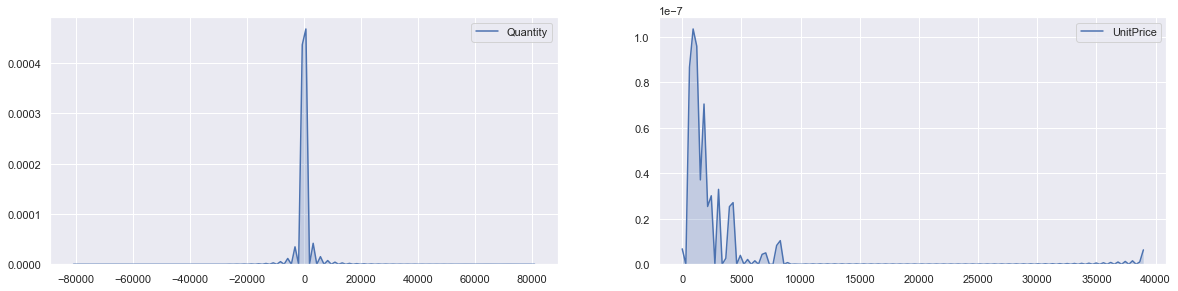

In [70]:
from pylab import *
sns.set(rc={"figure.figsize": (20, 10)})
subplot(2,2,1)
ax = sns.kdeplot(data_var1['Quantity'],shade=True)
subplot(2,2,2)
ax = sns.kdeplot(data_var1['UnitPrice'],shade=True)
plt.show()

##### *a) Quantity*

In [71]:
data_var1['Quantity'].unique()

array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     -1,     50,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     72,    200,    600,
          480,     -6,     14,     -2,     -4,     -5,     -7,     -3,
           11,     70,    252,     60,    216,    384,     27,    108,
           52,  -9360,     75,    270,     42,    240,     90,    320,
           17,   1824,    204,     69,    -36,   -192,   -144,    160,
         2880,   1400,     19,     39,    -48,    -50,     56,     13,
         1440,     -8,     15,    720,    -20,    156,    324,     41,
          -10,    -72,    -11,    402,    378,    150,    300,     22,
           34,    408,    972,    208,   1008,     26,   1000,    -25,
         1488,    250,   1394,    400,    110,    -14,     37,    -33,
      

Having a look at the data dist.ipynb_checkpoints/ipynb_checkpoints/ibution of the 'Quantity' variable reveals that there are many negative values present. These stem from cancelled orders. Due to large ordered (and canceled) quantities, the distribution is very wide spread in negative and positive direction.
From the descriptive statistics table in the beginning it can be observed that 75% of orders contained a quantity of 10 or less items. 

To get a clearer view on the majority of the data points, I will zoom in a little and neglect the extreme values on both ends.

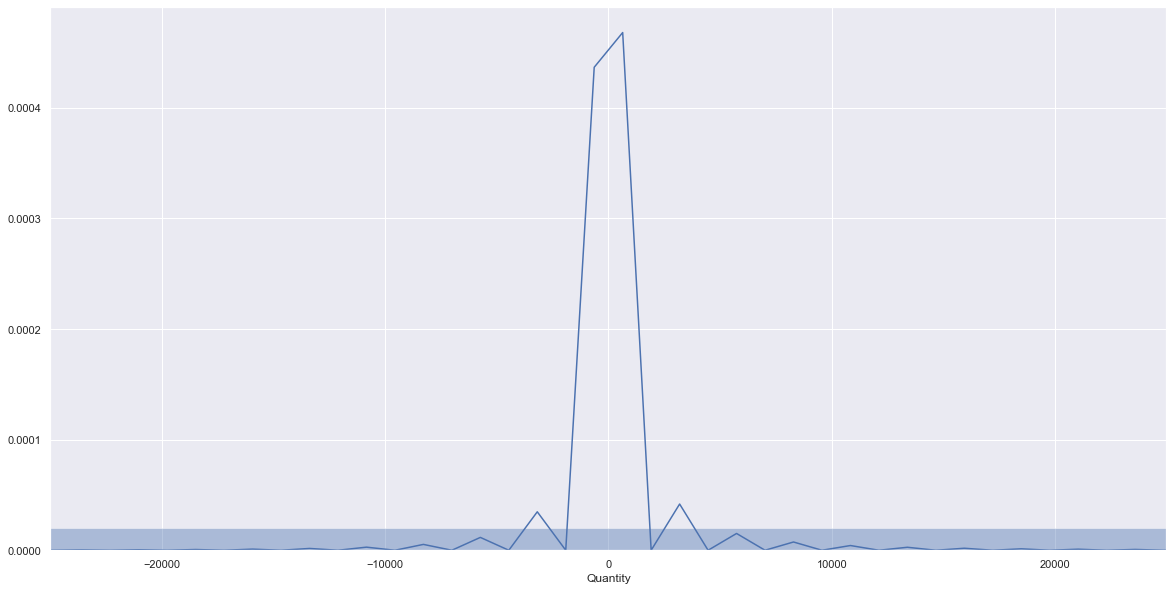

In [72]:
sns.distplot(data_var1['Quantity'], xlim(-25000,25000))

Noteworthy is that there is a large amount of canceled orders. I will obtain more details on these cases later on.

##### *b) UnitPrice*

Nearly all unit prices fall in the range of 0-10,000 GBP. Suspicious is the small peak at a unit price of close to 40,000 GBP. I will investigate this manually to see if the incidents there are authentic transactions or potential errors/outliers.

In [88]:
price_outliers = data_var1['UnitPrice'].loc[lambda x : x >10000]
price_outliers

222681    38970.0
Name: UnitPrice, dtype: float64

In [90]:
data_var1.loc[222681]

InvoiceNo                  C556445
StockCode                        M
Description                 Manual
Quantity                        -1
InvoiceDate    2011-06-10 15:31:00
UnitPrice                    38970
CustomerID                   15098
Country             United Kingdom
Name: 222681, dtype: object

In fact, only one transaction exists where the unit price was greater than 10,000 GBP. The transaction relates to a canceled order with the product description 'Manual' and a quantity of -1. Since this transaction is not a regular one, I will remove it from the data set.

In [ ]:
######## values below are atually not dropped. check out why!

In [95]:
data_var1.drop(price_outliers.index)
data_var1['UnitPrice'].loc[lambda x : x >10000]

222681    38970.0
Name: UnitPrice, dtype: float64

##### Identify unique transactions and customers

In [97]:
price_outliers.index

Int64Index([222681], dtype='int64')

In [35]:
# Find out share of cancelled orders of total orders
data_var1['Canceled'] = data_var1['InvoiceNo'].apply(lambda x:int('C' in x))

n1 = data_var1['Canceled'].sum()
n2 = data_var1.shape[0]
print('Number of orders canceled: {}/{} ({:.2f}%) '.format(n1, n2, n1/n2*100))

Number of orders canceled: 8872/401604 (2.21%) 


In [ ]:
df_check = df_initial[df_initial['Quantity'] < 0][['CustomerID','Quantity',
                                                   'StockCode','Description','UnitPrice']]
for index, col in  df_check.iterrows():
    if df_initial[(df_initial['CustomerID'] == col[0]) & (df_initial['Quantity'] == -col[1]) 
                & (df_initial['Description'] == col[2])].shape[0] == 0: 
        print(df_check.loc[index])

        break

The data set contains.ipynb_checkpoints/25,900 unique invoice numbers, meaning that the 541,909 transactions 

show countries on a world map

### Findings:

- large share (xx %) of users order large quantities(over xx items) per order
- high share of canceled orders (xx %)